In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib as plt

In [2]:
data2 = pd.read_csv("C:\\Users\DITU\Downloads\Static4.csv",encoding= 'unicode_escape')
val = pd.read_csv("C:\\Users\DITU\Downloads\Vall.csv",encoding= 'unicode_escape')

In [3]:
data2.describe()
data2.isnull().sum().sort_values(ascending=False)/data2.shape[0]

DAS    0.481522
FOS    0.300000
ODH    0.261957
DE     0.157609
CO     0.042391
FA     0.020652
dtype: float64

In [4]:
data2.head()

,DE,CO,FA,ODH,DAS,FOS
0,1800,10.0,20.0,60.0,38.0,1.64
1,1800,20.0,20.0,60.0,38.0,1.65
2,1800,30.0,20.0,60.0,38.0,1.69
3,1800,10.0,25.0,60.0,38.0,1.65
4,1800,20.0,25.0,60.0,38.0,1.69


In [5]:
len(data2)

920

In [6]:
data2['DE'] = pd.to_numeric(data2['DE'],errors = 'coerce')
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
DE     774 non-null float64
CO     881 non-null float64
FA     901 non-null float64
ODH    679 non-null float64
DAS    477 non-null float64
FOS    644 non-null float64
dtypes: float64(6)
memory usage: 43.2 KB
None


In [7]:
data2 = data2.reset_index(drop=True)

In [8]:
data2= data2.dropna()

In [9]:
len(data2)

312

In [10]:
data2 = pd.get_dummies(data2)

In [11]:
data2.iloc[0:,:6].head(10)

,DE,CO,FA,ODH,DAS,FOS
0,1800.0,10.0,20.0,60.0,38.0,1.64
1,1800.0,20.0,20.0,60.0,38.0,1.65
2,1800.0,30.0,20.0,60.0,38.0,1.69
3,1800.0,10.0,25.0,60.0,38.0,1.65
4,1800.0,20.0,25.0,60.0,38.0,1.69
5,1800.0,30.0,25.0,60.0,38.0,1.69
6,1800.0,10.0,29.0,60.0,38.0,1.69
7,1800.0,20.0,29.0,60.0,38.0,1.69
8,1800.0,30.0,29.0,60.0,38.0,1.69
9,1800.0,10.0,20.0,90.0,38.0,1.56


In [12]:
data2.drop(data2.iloc[:, 6:], inplace=True, axis=1)

In [13]:
data2.shape

(312, 6)

In [14]:
data2.isnull().sum()

DE     0
CO     0
FA     0
ODH    0
DAS    0
FOS    0
dtype: int64

In [15]:
 data2['DE']=(data2['DE']-data2['DE'].min())/(data2['DE'].max()-data2['DE'].min())

In [16]:
data2['CO']=(data2['CO']-data2['CO'].min())/(data2['CO'].max()-data2['CO'].min())

In [17]:
data2['FA']=(data2['FA']-data2['FA'].min())/(data2['FA'].max()-data2['FA'].min())

In [18]:
data2['ODH']=(data2['ODH']-data2['ODH'].min())/(data2['ODH'].max()-data2['ODH'].min())

In [19]:
data2['DAS']=(data2['DAS']-data2['DAS'].min())/(data2['DAS'].max()-data2['DAS'].min())

In [20]:
data2['FOS']=(data2['FOS']-data2['FOS'].min())/(data2['FOS'].max()-data2['FOS'].min())

In [21]:
labels = np.array(data2['FOS'])
data2= data2.drop('FOS', axis = 1)
val= val.drop('FOS', axis=1)
feature_list = list(data2.columns)
data2 = np.array(data2)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(249, 5) (249,)
(63, 5) (63,)


# Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

gb = GradientBoostingRegressor(n_estimators=30, max_depth =2)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [24]:
gb.predict(val)

array([0.26925688, 0.26925688, 0.26925688])

In [25]:
mae_gb = mean_absolute_error(y_test, y_pred)
mse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)
rmse_gb = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae_gb)  
print('Mean Squared Error:', mse_gb)
print('R2 Score:',  r2_gb)  
print('Root mean square error:',  rmse_gb)

Mean Absolute Error: 0.07786991967345062
Mean Squared Error: 0.024926310735580205
R2 Score: 0.031239076323319126
Root mean square error: 0.15788068512512923


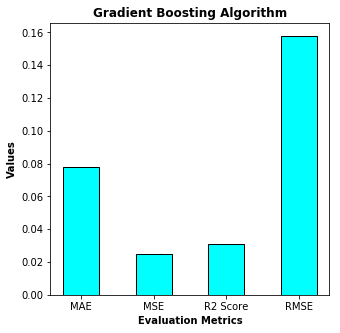

In [47]:
import matplotlib.pyplot as plt
 
data ={'MAE':mae_gb, 'MSE':mse_gb, 'R2 Score': r2_gb, 'RMSE': rmse_gb}
key_gb = list(data.keys())
val_gb = list(data.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_gb, val_gb, width=0.5,edgecolor = "black", color ='cyan')

plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("Gradient Boosting Algorithm", fontweight="bold")
plt.show()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=180, min_samples_split=6)


forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [28]:
forest.predict(val)

array([0.21251419, 0.21251419, 0.21251419])

In [29]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae_rf)  
print('Mean Squared Error:',mse_rf)
print('R2 Score:', r2_rf)  
print('Root mean square error:',  rmse_rf)

Mean Absolute Error: 0.08175381187040734
Mean Squared Error: 0.031191884059295242
R2 Score: -0.21227239494234085
Root mean square error: 0.17661224209916832


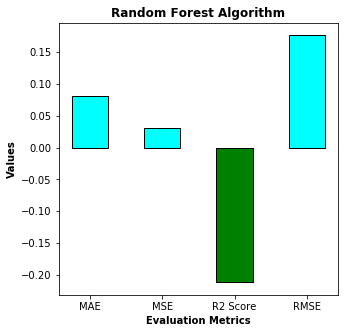

In [30]:
import matplotlib.pyplot as plt
 
data ={'MAE':mae_rf, 'MSE':mse_rf, 'R2 Score': r2_rf, 'RMSE': rmse_rf}
data1 ={'MAE':0, 'MSE':0, 'R2 Score': r2_rf, 'RMSE':0}
key_rf = list(data.keys())
val_rf = list(data.values())
key_rf1 = list(data1.keys())
val_rf1 = list(data1.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_rf, val_rf, width=0.5,edgecolor = "black", color ='cyan')
ax.bar(key_rf1,val_rf1,width=0.5, edgecolor="black", color ='green')

plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("Random Forest Algorithm", fontweight="bold")
plt.show()

# Bagging regressor

In [31]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor(n_estimators=10)


br.fit(X_train, y_train)
y_pred = br.predict(X_test)

In [32]:
br.predict(val)

array([0.30641639, 0.30641639, 0.30641639])

In [33]:
mae_br = mean_absolute_error(y_test, y_pred)
mse_br = mean_squared_error(y_test, y_pred)
r2_br = r2_score(y_test, y_pred)
rmse_br = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae_br)  
print('Mean Squared Error:',mse_br)
print('R2 Score:', r2_br)  
print('Root mean square error:',  rmse_br)

Mean Absolute Error: 0.08516712781141966
Mean Squared Error: 0.03384173647742812
R2 Score: -0.3152588939645573
Root mean square error: 0.1839612363445846


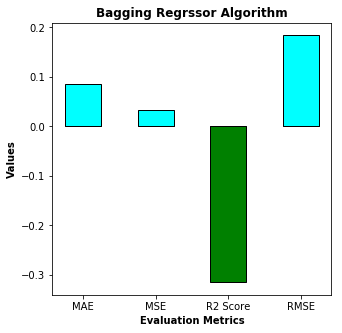

In [34]:
import matplotlib.pyplot as plt
 
data ={'MAE':mae_br, 'MSE':mse_br, 'R2 Score': 0, 'RMSE': rmse_br}
data1 ={'MAE':0, 'MSE':0, 'R2 Score': r2_br, 'RMSE':0}
key_br = list(data.keys())
val_br = list(data.values())
key_br1 = list(data1.keys())
val_br1 = list(data1.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_br, val_br, width=0.5,edgecolor = "black", color ='cyan')
ax.bar(key_br1, val_br1,width=0.5, edgecolor = "black", color ='green')


plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("Bagging Regrssor Algorithm", fontweight="bold")
plt.show()

# Extra trees


In [35]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10)

etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)

In [36]:
etr.predict(val)

array([0.2938964, 0.2938964, 0.2938964])

In [37]:
mae_etr = mean_absolute_error(y_test, y_pred)
mse_etr = mean_squared_error(y_test, y_pred)
r2_etr = r2_score(y_test, y_pred)
rmse_etr = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae_etr)  
print('Mean Squared Error:',mse_etr)
print('R2 Score:', r2_etr)  
print('Root mean square error:',  rmse_etr)

Mean Absolute Error: 0.08375342158152846
Mean Squared Error: 0.032602516105494986
R2 Score: -0.2670966013217362
Root mean square error: 0.18056166842797777


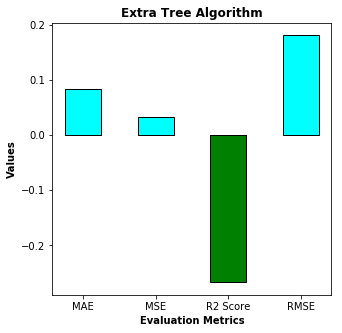

In [38]:
import matplotlib.pyplot as plt
 
data ={'MAE':mae_etr, 'MSE':mse_etr, 'R2 Score': 0, 'RMSE': rmse_etr}
data1 ={'MAE':0, 'MSE':0, 'R2 Score': r2_etr, 'RMSE':0}
key_etr = list(data.keys())
val_etr = list(data.values())
key_etr1 = list(data1.keys())
val_etr1 = list(data1.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_etr, val_etr, width=0.5,edgecolor = "black", color ='cyan')
ax.bar(key_etr1, val_etr1,width=0.5, edgecolor = "black", color ='green')

plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("Extra Tree Algorithm", fontweight="bold")
plt.show()

# Ada Boost

In [39]:
from sklearn.ensemble import AdaBoostRegressor
ad  = AdaBoostRegressor(n_estimators=40, random_state=2, learning_rate=3.0)


ad.fit(X_train, y_train)
y_pred = ad.predict(X_test)

acc=  ad.score(X_test, y_pred)
print(acc)

1.0


In [40]:
ad.predict(val)

array([0.51380649, 0.51380649, 0.51380649])

In [41]:
mae_ada = mean_absolute_error(y_test, y_pred)
mse_ada = mean_squared_error(y_test, y_pred)
r2_ada = r2_score(y_test, y_pred)
rmse_ada = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae_ada)  
print('Mean Squared Error:',mse_ada)
print('R2 Score:', r2_ada)  
print('Root mean square error:',  rmse_ada)

Mean Absolute Error: 0.09173612896612764
Mean Squared Error: 0.024886790593134252
R2 Score: 0.03277502643265984
Root mean square error: 0.15775547722071095


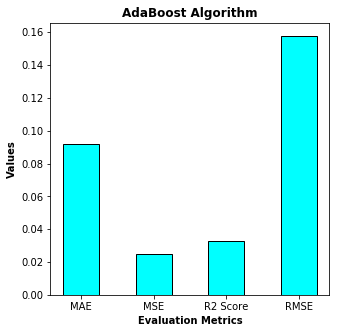

In [42]:
import matplotlib.pyplot as plt
 
data ={'MAE':mae_ada, 'MSE':mse_ada, 'R2 Score': r2_ada, 'RMSE': rmse_ada}
data1 ={'MAE':0, 'MSE':0, 'R2 Score': r2_ada, 'RMSE': 0}
key_ada = list(data.keys())
val_ada = list(data.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_ada, val_ada, width=0.5,edgecolor = "black", color ='cyan')

plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("AdaBoost Algorithm", fontweight="bold")
plt.show()

# Neural Network

In [43]:
from sklearn.neural_network import MLPRegressor
nn= MLPRegressor(random_state=6,  max_iter=260)

sc=MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

nn.fit(X_train_norm, y_train)
y_pred = nn.predict(X_test_norm)

acc=  nn.score(X_test_norm, y_pred)
print(acc)

1.0


In [44]:
nn.predict(val)

array([-3.97315877, -3.38168961, -2.98925155])

In [45]:
mae_nn = mean_absolute_error(y_test, y_pred)
mse_nn = mean_squared_error(y_test, y_pred)
r2_nn = r2_score(y_test, y_pred)
rmse_nn = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Squared Error:',mse_nn)
print('Mean Absolute Error:', mae_nn)  
print('R2 Score:', r2_nn)  
print('Root mean square error:',  rmse_nn)

Mean Squared Error: 0.026974129491833303
Mean Absolute Error: 0.09113690420572007
R2 Score: -0.04834938788524146
Root mean square error: 0.16423802693600925


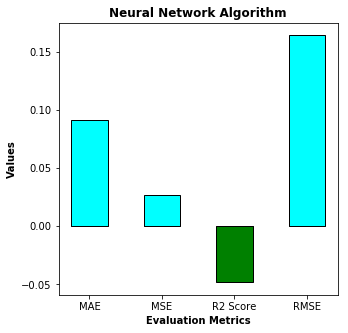

In [46]:
import matplotlib.pyplot as plt
 

data ={'MAE':mae_nn, 'MSE':mse_nn, 'R2 Score': 0, 'RMSE': rmse_nn}
data1 ={'MAE':0, 'MSE':0, 'R2 Score': r2_nn, 'RMSE':0}
key_nn = list(data.keys())
val_nn = list(data.values())
key_nn1 = list(data1.keys())
val_nn1 = list(data1.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_nn, val_nn, width=0.5,edgecolor = "black", color ='cyan')
ax.bar(key_nn1,val_nn1,width=0.5, edgecolor="black", color ='green')

plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("Neural Network Algorithm", fontweight="bold")
plt.show()